In [2]:
import os
import shutil
import requests
import gzip
import shutil
import pandas as pd
import os

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

url = 'https://bulk.meteostat.net/v2/daily/KGVQ0.csv.gz'
dataset = 'imdevskp/corona-virus-report'

api.dataset_download_files(
    dataset, path='../data/corona_virus_report', unzip=True,)

shutil.move('../data/corona_virus_report/usa_county_wise.csv', '../data')

covid_data_csv = pd.read_csv('../data/usa_county_wise.csv')

shutil.rmtree('../data/corona_virus_report')
compressed_file_path = 'KGVQ0.csv.gz'
extracted_file_path = 'KGVQ0.csv'

with requests.get(url, stream=True) as response:
    with open(compressed_file_path, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

file = pd.read_csv("KGVQ0.csv")

headerList = ['date', 'tavg', 'tmin', 'tmax', 'prcp',
              'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
file.to_csv("KGVQ0.csv", header=headerList, index=False)

file_updated = pd.read_csv("KGVQ0.csv")

shutil.move('KGVQ0.csv', '../data')
os.remove("KGVQ0.csv.gz")


Dataset URL: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
             UID iso2 iso3  code3     FIPS          Admin2  \
0             16   AS  ASM     16     60.0             NaN   
1            316   GU  GUM    316     66.0             NaN   
2            580   MP  MNP    580     69.0             NaN   
3       63072001   PR  PRI    630  72001.0        Adjuntas   
4       63072003   PR  PRI    630  72003.0          Aguada   
...          ...  ...  ...    ...      ...             ...   
627915  84070016   US  USA    840      NaN    Central Utah   
627916  84070017   US  USA    840      NaN  Southeast Utah   
627917  84070018   US  USA    840      NaN  Southwest Utah   
627918  84070019   US  USA    840      NaN       TriCounty   
627919  84070020   US  USA    840      NaN    Weber-Morgan   

                  Province_State Country_Region        Lat       Long_  \
0                 American Samoa             US -14.271000 -170.132000   
1                           Guam 

C:\Users\hatef\AppData\Local\Temp\ipykernel_45424\368876638.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_data_alabama['Date'] = pd.to_datetime(covid_data_alabama['Date'])


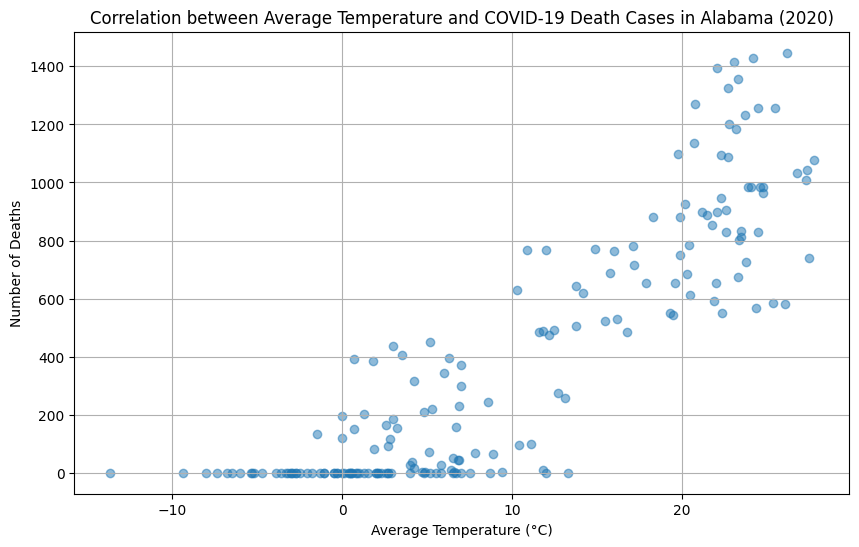

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = file_updated
covid_data = covid_data_csv

weather_data.columns = ['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data_alabama = weather_data[(weather_data['date'] >= '2020-01-01') & (weather_data['date'] < '2021-01-01')]
weather_data_alabama = weather_data_alabama[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'tsun']].groupby('date').mean().reset_index()

covid_data_alabama = covid_data[(covid_data['Province_State'] == 'Alabama') ]
covid_data_alabama = covid_data_alabama[['Date', 'Deaths']].groupby('Date').sum().reset_index()
covid_data_alabama['Date'] = pd.to_datetime(covid_data_alabama['Date'])
covid_data_alabama.columns = ['date', 'deaths']

merged_data = pd.merge(weather_data_alabama, covid_data_alabama, on='date', how='inner')


merged_data.to_csv('../data/alabama_covid_weather.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(merged_data['tavg'], merged_data['deaths'], alpha=0.5)
plt.title('Correlation between Average Temperature and COVID-19 Death Cases in Alabama (2020)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()



